# Analysis distances between interacting digests

In this notebook, we use the script ```diachrscripts/analyze_interaction_distances_script.py``` in order to analyse the distances between interacting digests for simple, twisted, undirected and indefinable interactions. The distance between digests is defined as the distance between the inner ends of two cis interacting digests. Interactions with a distance of less than 10,000 bp are excluded from this analysis.

The categories simple, twisted, undirected and indefinable are defined using a binomial distribution. Let ```ks``` and ```kt``` the numbers of simple and twisted read pairs of a given interaction. An interaction is defined to be *simple*, if ```1 - binom.cdf(k = kt-1, n = ks + kt, p = 0.5) <= 0.05``` and ```ks < kt```. Otherwise, if ```1 - binom.cdf(k = ks-1, n = ks + kt, p = 0.5) <= 0.05``` and ```kt < ks``` the interaction is defined to be *twisted*. All remaining interactions are defined to be *undirected*, if ```4 < kt + ks```, or indefinable, if ```kt + ks < 5```.

This analysis can be restricted to particular subsets of interactions depending on the status of interacting digest using the ```STATUS_PAIR_FLAG```. The default is ```ALL```. ```AA```, for instance, can be used to restrict the analysis to interactions between digests that were selected for enrichment.

## Choose dataset

We analyzed four datasets, three capture Hi-C (Mifsud 2015, Schoenfelder 2015, Chesi 2019) and one Hi-C dataset (Nora 2017). In this section, individual datasets can be selected for the analysis that can be performed in the third section of this notebook.

### Mifsud 2015 (capture Hi-C, hg38, HindIII)

In [76]:
# Create output directory
!mkdir -p ../results/mifsud

#### Replicate 1

In [77]:
OUT_PREFIX = "../results/mifsud/k_interaction_analysis_mifsud_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2

In [ ]:
OUT_PREFIX = "../results/mifsud/k_interaction_analysis_mifsud_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R20.interaction.counts.table.gt1.tsv.gz"

#### Replicate 3

In [ ]:
OUT_PREFIX = "../results/mifsud/k_interaction_analysis_mifsud_r3"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R30.interaction.counts.table.gt1.tsv.gz"

### Schoenfelder 2015

In [86]:
# Create output directory
!mkdir -p ../results/schoenefelder

#### Replicate 1

In [79]:
OUT_PREFIX = "../results/schoenefelder/k_interaction_analysis_schoenefelder_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2

In [92]:
OUT_PREFIX = "../results/schoenefelder/k_interaction_analysis_schoenefelder_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R20.interaction.counts.table.gt1.tsv.gz"

### Chesi 2019

In [76]:
# Create output directory
!mkdir -p ../results/chesi

### Nora 2017 (gone boundary bins)

In [97]:
# Create output directory
!mkdir -p ../results/nora

In [98]:
OUT_PREFIX = "../results/nora/k_interaction_analysis_nora_GSM2644945"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644945_bins.interaction.counts.table.gt1.tsv.gz"

## Perform analysis

In [ ]:
# Run Python script
!python ../analyze_interaction_distances_script.py --out-prefix $OUT_PREFIX --status-pair-flag $STATUS_PAIR_FLAG --interaction-file $INTERACTION_FILE

	[INFO] 0 interactions processed ...
	[INFO] 1000000 interactions processed ...
	[INFO] 2000000 interactions processed ...
	[INFO] 3000000 interactions processed ...
	[INFO] 4000000 interactions processed ...
	[INFO] 5000000 interactions processed ...
	[INFO] 6000000 interactions processed ...
	[INFO] 7000000 interactions processed ...
	[INFO] 8000000 interactions processed ...
	[INFO] 9000000 interactions processed ...
	[INFO] 10000000 interactions processed ...
	[INFO] 11000000 interactions processed ...


In [94]:
import numpy as np

# Load saved numpy arrays from disk
distance_array_simple = np.load("../results/mifsud/k_interaction_analysis_mifsud_r1_distance_array_simple.npy")
distance_array_twisted = np.load("../results/mifsud/k_interaction_analysis_mifsud_r1_distance_array_twisted.npy")
distance_array_undirected = np.load("../results/mifsud/k_interaction_analysis_mifsud_r1_distance_array_undirected.npy")
distance_array_indefinable = np.load("../results/mifsud/k_interaction_analysis_mifsud_r1_distance_array_indefinable.npy")

# Determine mean distances
print("Mean distances:")
print("\tSimple: " + str(int(distance_array_simple.mean())))
print("\tTwisted: " + str(int(distance_array_twisted.mean())))
print("\tUndirected: " + str(int(distance_array_undirected.mean())))
print("\tIndefinable: " + str(int(distance_array_indefinable.mean())))

# Determine median distances
print("Median distances:")
print("\tSimple: " + str(int(np.median(distance_array_simple))))
print("\tTwisted: " + str(int(np.median(distance_array_twisted))))
print("\tUndirected: " + str(int(np.median(distance_array_undirected))))
print("\tIndefinable: " + str(int(np.median(distance_array_indefinable))))

# Perform T-tests
print(" T-tests:")
from scipy import stats

res = stats.ttest_ind(distance_array_simple, distance_array_twisted)
print("\tSimple vs. Twisted: " + str(res))

res = stats.ttest_ind(distance_array_simple, distance_array_undirected)
print("\tSimple vs. Undirected: " + str(res))

res = stats.ttest_ind(distance_array_simple, distance_array_indefinable)
print("\tSimple vs. Indefinable: " + str(res))

res = stats.ttest_ind(distance_array_twisted, distance_array_undirected)
print("\tTwisted vs. Undirected: " + str(res))

res = stats.ttest_ind(distance_array_twisted, distance_array_indefinable)
print("\tTwisted vs. Indefinable: " + str(res))

res = stats.ttest_ind(distance_array_undirected, distance_array_indefinable)
print("\tUndirected vs. Indefinable: " + str(res))



Mean distances:
	Simple: 56623
	Twisted: 72224
	Undirected: 65260
	Indefinable: 7509062
Median distances:
	Simple: 24348
	Twisted: 31323
	Undirected: 31965
	Indefinable: 224541
 T-tests:
	Simple vs. Twisted: Ttest_indResult(statistic=-3.439780486931736, pvalue=0.000585444667182493)
	Simple vs. Undirected: Ttest_indResult(statistic=-5.675448196792727, pvalue=1.3867698746972696e-08)
	Simple vs. Indefinable: Ttest_indResult(statistic=-18.976076765368113, pvalue=2.7901487285564247e-80)
	Twisted vs. Undirected: Ttest_indResult(statistic=3.8487769332241153, pvalue=0.00011877727412793397)
	Twisted vs. Indefinable: Ttest_indResult(statistic=-17.5859946611067, pvalue=3.2408105228882374e-69)
	Undirected vs. Indefinable: Ttest_indResult(statistic=-97.9651510084545, pvalue=0.0)


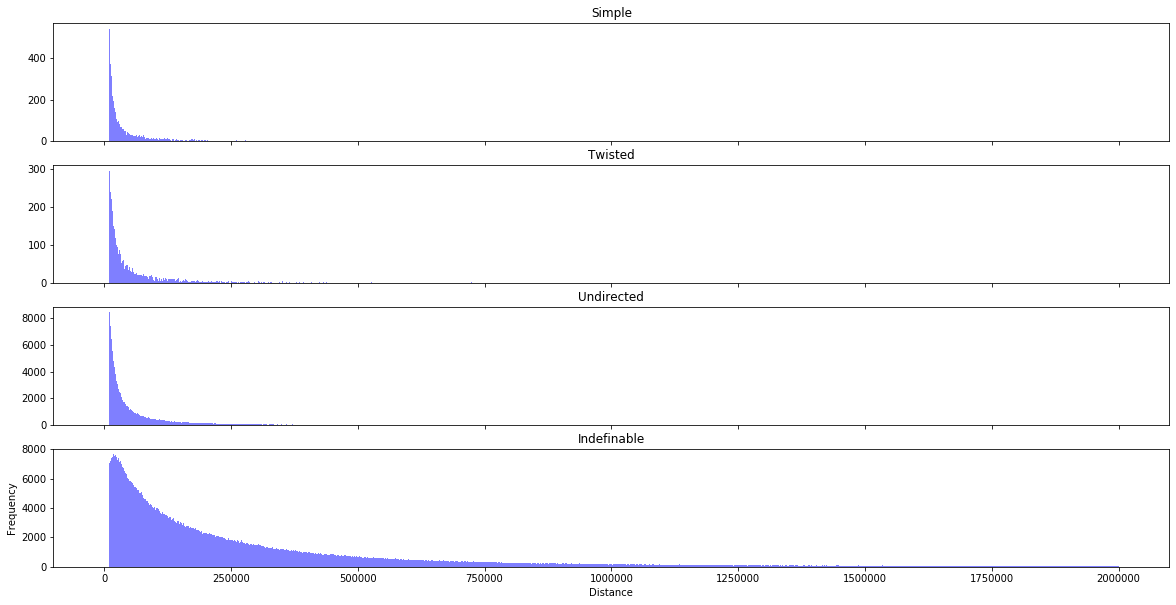

In [89]:
# Create distance histograms
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
num_bins = 1000
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False)
f.canvas.set_window_title('Distances between interacting digests')
plt.xlabel("Distance")
plt.ylabel("Frequency")

ax1.set_title("Simple")
n, bins, patches = ax1.hist(distance_array_simple, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax2.set_title("Twisted")
n, bins, patches = ax2.hist(distance_array_twisted, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax3.set_title("Undirected")
n, bins, patches = ax3.hist(distance_array_undirected, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

ax4.set_title("Indefinable")
n, bins, patches = ax4.hist(distance_array_indefinable, num_bins, facecolor='blue', alpha=0.5, range=(0,2000000))

plt.show()

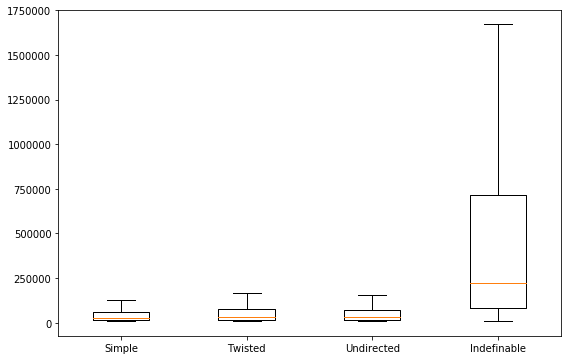

In [90]:
# Create boxplot for simple, twisted, undirected and indefinable

# Combine arrays into a list    
data_to_plot = [distance_array_simple, distance_array_twisted, distance_array_undirected, distance_array_indefinable]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)
plt.xticks([1, 2, 3, 4], ['Simple', 'Twisted', 'Undirected', 'Indefinable'])

# Save the figure
fig.savefig('boxplot_1.png', bbox_inches='tight')


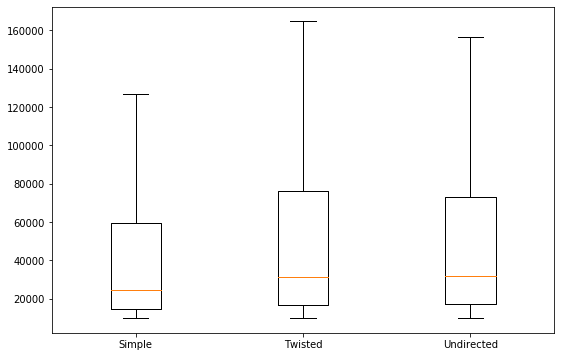

In [91]:
# Create boxplot for simple, twisted, undirected only

# Combine these different collections into a list    
data_to_plot = [distance_array_simple, distance_array_twisted, distance_array_undirected]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)
plt.xticks([1, 2, 3], ['Simple', 'Twisted', 'Undirected'])

# Save the figure
fig.savefig('boxplot_2.png', bbox_inches='tight')